In [24]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_table('prostate.data',sep = '\t')



train = data.loc[data['train'] == 'T']
test = data.loc[data['train'] == 'F']

#train.reset_index()
#test.reset_index(drop=True,inplace=False)

prostate_X_train = train.iloc[:,1:9]
prostate_y_train= train.iloc[:,9:10]

prostate_X_test = test.iloc[:,1:9]
prostate_y_test= test.iloc[:,9:10]


Best alpha value:  1.0
Mean squared error with 8 predictors: 0.52
R square with 8 predictors : 0.50


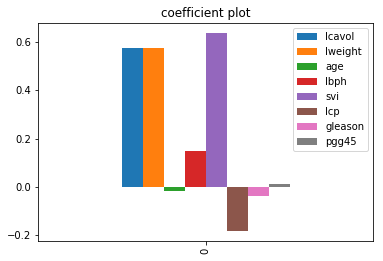

In [26]:

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100]).fit(prostate_X_train, prostate_y_train)
print("Best alpha value: ",  clf.alpha_ )


coef_df = pd.DataFrame(clf.coef_)
coef_df.columns = prostate_X_train.columns
coef_df.plot(kind='bar',title='coefficient plot')
prostate_y_pred = clf.predict(prostate_X_test)

# The mean squared error
print("Mean squared error with 8 predictors: %.2f" % mean_squared_error(prostate_y_test, prostate_y_pred))
#Explained variance score: 1 is perfect prediction
print('R square with 8 predictors : %.2f' % r2_score(prostate_y_test, prostate_y_pred))


In [27]:
prostate_X_train = train.iloc[:,[1,2,5]]
prostate_y_train= train.iloc[:,9:10]


prostate_X_test = test.iloc[:,[1,2,5]]
prostate_y_test= test.iloc[:,9:10]

clf = Ridge(alpha=1.0)
clf.fit(prostate_X_train, prostate_y_train)
prostate_y_pred = clf.predict(prostate_X_test)
# The mean squared error
print("Mean squared error with 3 predictors: %.2f" % mean_squared_error(prostate_y_test, prostate_y_pred))
#Explained variance score: 1 is perfect prediction
print('R square with 3 predictors: %.2f' % r2_score(prostate_y_test, prostate_y_pred))


Mean squared error with 3 predictors: 0.40
R square with 3 predictors: 0.62
